In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [ ]:
class BMIState(TypedDict):
    height_m : float
    weight_kg : float
    bmi : float

In [14]:
def bmi_calc(state: BMIState) -> BMIState:
    weight = state['weight_kg']
    height = state['height_m']

    bmi = weight / (height ** 2)

    state['bmi'] = round(bmi, 2)

    return state

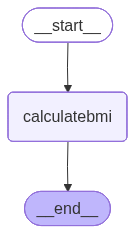

In [15]:
graph = StateGraph(BMIState)

#adding node
graph.add_node('calculatebmi', bmi_calc)

#adding edges
graph.add_edge(START, 'calculatebmi')
graph.add_edge('calculatebmi', END)

flow = graph.compile()
flow

In [16]:
init_state = {'height_m': 2, 'weight_kg': 85}
final_state = flow.invoke(init_state)
final_state['bmi']

21.25